In [3]:
import pandas as pd
import numpy as np

table = pd.read_excel("Ask A Manager Salary Survey 2021 (Responses).xlsx")
df = pd.DataFrame(table)

In [4]:
# Delete na values of last 3 columns
df.dropna(subset=df.iloc[:, -3:].columns, inplace=True)
df.dropna(subset=df.columns[2], inplace=True)
df.iloc[:, 3] = df.iloc[:, 3].replace('na', np.nan)
df.dropna(subset=df.columns[3], inplace=True)

# Delete columns that we don't use
columns_to_delete = [
                'Timestamp', 'If your job title needs additional context, please clarify here:',
                'If your income needs additional context, please provide it here:', 
                "If you're in the U.S., what state do you work in?", 'What city do you work in?', 
                'How many years of professional work experience do you have overall?'
                ]

df.drop(columns=columns_to_delete, inplace=True)

# Change columns' name
names_columns = ['Age', 'Industry', 'Job Title', 'Salary', 'Additional', 'Currency', 'Other Currency', 'Country', 'Years job',
                 'Highest Education', 'Gender', 'Race']
df.columns = names_columns

# Delete elements where the salary is equal to 0 
df = df[df.loc[:, 'Salary'] != 0]

df['Country'] = df['Country'].str.strip()
df['Other Currency'] = df['Other Currency'].str.strip()


In [5]:
# Filtered by USA
us = [
        'U.S', 'U.S>', 'United States', 'usa', 'United States of America', 'United States Of America', 'UXZ',
        'U.S.A.', 'US', 'Usa', 'The United State', 'Usa ', 'UsA', 'United  States', 'U.S.A', 'USaa', 'Unted States',
        'United statew', 'United Sttes', 'Unitied States', 'USAB', 'Uniited States', 'Untied States', 'United Statues',
        'United Statesp', 'Uniteed States', 'USS', 'U.s.a.', 'U.SA', 'united stated', 'United Stattes', 'United Statees',
        'UNited States', 'Uniyed states', 'Uniyed states', 'Uniyed States', 'United States of Americas', 'US of A', 'UA',
        'United Statss', 'uS', 'USD', 'United states of america', 'United States is America', 'america', 'United Statws',
        'United Stateds', 'U. S', 'Uniter Statez', 'united states of aamerica', 'uSA', 'USaa', 'United STates', 'Unitef Stated',
        'Usat', 'San Francisco', 'United States of American', 'United Status', 'United Sates of America', 'u.s.', 'United y',
        'Unite States', 'The US', 'USA tomorrow', 'IS', 'is', 'I.S.', 'United Statea', 'ISA','U.s.', 'United Stares',
        'Unites states', 'United State of America', '🇺🇸', 'united States', 'UnitedStates', 'United states of America',
        'United Sates', 'The United States', 'UNITED STATES', 'United States of america', 'Unites States', 'United State',
        'America', 'Us', 'united states', 'United states', 'USA', 'US', 'U.S.', 'California', 'america', 'Hartford', 'U.A.', 
        'USA-- Virgin Islands', 'united states of america', 'Uniyes States', 'U. S.', 'us', 'United Stated', 'Virginia',
        'Worldwide (based in US but short term trips aroudn the world', 'USA (company is based in a US territory, I work remote)',
        'United States (I work from home and my clients are all over the US/Canada/PR', 'For the United States government, but posted overseas',
        'Currently finance', 'bonus based on meeting yearly goals set w/ my supervisor', 'Y', 'US govt employee overseas, country withheld',
        "I earn commission on sales. If I meet quota, I'm guaranteed another 16k min. Last year i earned an additional 27k. It's not uncommon for people in my space to earn 100k+ after commission.",
        'I work for a UAE-based organization, though I am personally in the US.', "USA, but for foreign gov't", 'Remote'
        ]

# Filtered by Canada
canada = [
        'Canada', 'canada', 'CANADA', 'Canda', 'Canadw', 'Can', 'Canad', 'Canadá', 'Csnada', 'Canada, Ottawa, ontario',
        'I am located in Canada but I work for a company in the US', '$2,17.84/year is deducted for benefits', 'Policy'
        ]

# Filtered by UK
uk = [
        'United Kingdom', 'UK', 'England', 'Uk', 'Scotland', 'United kingdom', 'U.K.', 'united kingdom', 'uk',
        'Great Britain', 'England, UK', 'Wales', 'England, United Kingdom', 'Northern Ireland', 'Scotland, UK',
        'england', 'UK (England)', 'United Kingdom (England)', 'Wales (UK)', 'Wales, UK', 'Northern Ireland, United Kingdom',
        'London', 'ENGLAND', 'Unites kingdom', 'England/UK', 'United Kingdom.', 'UK (Northern Ireland)', 'United Kindom',
        'United Kingdomk', 'UK, remote', 'England, UK.', 'Britain', 'Englang', 'Wales (United Kingdom)', 'U.K',
        'England, Gb', 'U.K. (northern England)', 'Isle of Man', 'UK for U.S. company'
        ]

df['Country'].replace(us, 'USA', inplace=True)
df['Country'].replace(canada, 'Canada', inplace=True)
df['Country'].replace(uk, 'United Kingdom', inplace=True)

In [6]:
errage = {
        'INDIA': 'India', 'Sri lanka': 'Sri Lanka', 'pakistan':'Pakistan', 'ARGENTINA BUT MY ORG IS IN THAILAND': 'Argentina',
        'United States- Puerto Rico': 'Puerto Rico', 'México':'Mexico', 'Brasil': 'Brazil', 'NZ': 'New Zealand',
        'New zealand': 'New Zealand', 'australia': 'Australia', 'Australian': 'Australia', 'New Zealand Aotearoa': 'New Zealand',
        'Australi': 'Australia', 'Aotearoa New Zealand': 'New Zealand', 'new zealand': 'New Zealand',  'japan': 'Japan',
        'From New Zealand but on projects across APAC': 'New Zealand', 'Remote (philippines)': 'Philippines', 'FRANCE': 'France',
        'singapore': 'Singapore', 'UAE': 'United Arab Emirates', 'Japan, US Gov position': 'Japan','Mainland China': 'China',
        'hong konh': 'Hong Kong', 'NIGERIA': 'Nigeria', 'South africa': 'South Africa', 'europe': 'Czech Republic',
        'the Netherlands': 'The Netherlands', 'NL': 'The Netherlands', 'Danmark': 'Denmark', 'Czechia': 'Czech Republic',
        'Czech republic': 'Czech Republic', 'Company in Germany. I work from Pakistan.': 'Germany', 'croatia': 'Croatia',
        'finland':'Finland', 'france': 'France', 'czech republic': 'Czech Republic', 'denmark': 'Denmark', 'spain': 'Spain',
        'From Romania, but for an US based company': 'Romania', 'Austria, but I work remotely for a Dutch/British company': 'Austria',
        'SWITZERLAND': 'Switzerland', 'switzerland': 'Switzerland', 'Luxemburg': 'Luxembourg', 'The netherlands': 'The Netherlands',
        'ireland': 'Ireland', 'netherlands': 'The Netherlands', 'germany': 'Germany', 'Netherlands': 'The Netherlands',
        'Nederland': 'Netherlands', 'Nederland': 'The Netherlands', 'Italy (South)': 'Italy', 'Catalonia': 'Spain',
        'Jersey, Channel islands': 'Jersey', 'the netherlands': 'The Netherlands'
        }

df['Country'].replace(errage, inplace=True)

countries = [
        'Afghanistan', 'Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belgium', 'Bermuda', 'Bosnia and Herzegovina', 'Brazil',
        'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
        'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece',
        'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kenya',
        'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Morocco', 'New Zealand', 'Nigeria',
        'Norway', 'Pakistan', 'Panamá', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saudi Arabia',
        'Serbia', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
        'Switzerland', 'Taiwan', 'Thailand', 'The Bahamas', 'The Netherlands', 'Trinidad and Tobago', 'Turkey', 'USA', 'Uganda', 'Ukraine',
        'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Vietnam'
]

df = df[df['Country'].isin(countries)]

In [7]:
# Shift value from Other Currency to Currency, delete the first and make Currency's values in Upper
df['Currency'] = df['Currency'].astype(str)
df['Other Currency'] = df['Other Currency'].astype(str)

df = df[df['Other Currency'].str.len() <= 25] 

currencies = {
        'US Dollar': 'USD', 'BRL (R$)': 'BRL', 'RM': 'MYR', 'Canadian': 'CAD', 'croatian kuna': 'HRK', 'Euro': 'EUR', 'Polish Złoty': 'PLN',
        'American Dollars': 'USD', 'AUD Australian': 'AUD', 'Australian Dollars': 'AUD', 'Singapore Dollara': 'SGD', 'canadian': 'CAD',
        'RMB (chinese yuan)': 'CNY', 'Canadian': 'CAD', 'PLN (Polish zloty)': 'PLN', 'PLN (Zwoty)': 'PLN', 'NIS (new Israeli shekel)': 'ILS',
        'Mexican Pesos': 'MXN', 'ILS/NIS': 'ILS', 'China RMB': 'CNY', 'Danish Kroner': 'DKK', 'czech crowns': 'CZK', 'Mexican pesos': 'MXN',
        'Philippine peso (PHP)': 'PHP', 'PhP (Philippine Peso)': 'PHP', 'Israeli Shekels': 'ILS', 'Norwegian kroner (NOK)': 'NOK',
        'Thai Baht': 'THB', 'Philippine Pesos': 'PHP', 'Taiwanese dollars': 'TWD', 'Argentine Peso': 'ARS', 'THAI  BAHT': 'THB', 'Rs': 'INR',
        'Argentinian peso (ARS)': 'ARS', 'NTD': 'TWD', 'Peso Argentino': 'ARS', 'Philippine Peso': 'PHP', 'INR (Indian Rupee)': 'INR',
        'Rupees': 'INR', 'Indian rupees': 'INR', 'KRW (Korean Won)': 'KRW', 'Korean Won': 'KRW'
}

df['Other Currency'].replace(currencies, inplace=True)
df['Currency'].mask(df['Currency']=='Other', df['Other Currency'], inplace=True)
df['Currency'].mask((df['Other Currency'].str.len() == 3) & (df['Other Currency']!= 'nan'), df['Other Currency'], inplace=True)
df['Currency'] = df['Currency'].str.upper()

df.drop(columns= 'Other Currency', inplace=True)
elements_to_delete = ['NAN', 'N/A', 'EQUITY']
df.drop(df[df['Currency'].isin(elements_to_delete)].index, inplace=True)

df.loc[(df['Country'] == 'Australia') & (df['Currency'] == 'AUD/NZD'), 'Currency'] = 'AUD'
df.loc[(df['Country'] == 'New Zealand') & (df['Currency'] == 'AUD/NZD'), 'Currency'] = 'NZD'


In [8]:
# Sum of columns Salary and Additional
df['Additional'].fillna(0, inplace=True) # otherwise, it creates a lot of blanks, because additional has them
df['Salary'] = df['Salary'] + df['Additional']
df.drop(columns='Additional', inplace=True)

In [9]:
# Standardize the Salary in USD, every pair at 31/12/2021 and drop Currency column
pair_currencies = {
        'GBP': 1.3529, 'EUR': 1.1368, 'CAD': 0.7915, 'TRY': 0.07507, 'BRL': 0.1795, 'BR$': 0.1795, 'PHP': 0.01961, 'AUD': 0.7262,
        'NZD': 0.6828, 'KWD': 3.3102, 'NGN': 0.00243, 'JPY': 0.00869, 'SEK': 0.1106, 'ZAR': 0.0625, 'PKR': 0.00569, 'MYR': 0.24015,
        'PLN': 0.2480, 'SGD': 0.7413, 'HRK': 0.000915, 'CHF': 1.0962, 'TTD': 0.1476, 'CNY': 0.1574, 'SAR': 0.2664, 'ILS': 0.3221,
        'MXN': 0.0488, 'CZK': 0.0458, 'DKK': 0.1529, 'HKD': 0.1283, 'THB': 0.0301, 'INR': 0.0134, 'NOK': 0.1135, 'TWD': 0.0317,
        'ARS': 0.00974, 'LKR': 0.00493, 'KRW': 0.000842, 'COP': 0.000246, 'IDR': 0.0000702
}

for i, row in df.iterrows():
        currency = row['Currency']
        if currency in pair_currencies:
                df.at[i, 'Salary'] *= pair_currencies[currency]
                df.at[i, 'Currency'] = 'USD'

df.drop(columns='Currency', inplace=True)


In [10]:
# Remove few values not useful for our research
df = df[df['Race'] != 'Another option not listed here or prefer not to answer']  
df = df[(df['Gender'] != 'Other or prefer not to answer') & (df['Gender'] != 'Non-binary')]

In [11]:
# Set threshold we use on Industry and Job Title columns to reduce elements 
threshold = 100

df['Industry'] = df['Industry'].str.strip().str.upper()
total_values_industry = df['Industry'].value_counts()
df['Industry'] = np.where(df['Industry'].isin(total_values_industry[total_values_industry < threshold].index), 'OTHERS', df['Industry'])

df['Job Title'] = df['Job Title'].str.strip().str.upper()
total_values_job = df['Job Title'].value_counts()
df['Job Title'] = np.where(df['Job Title'].isin(total_values_job[total_values_job < threshold].index), 'OTHERS', df['Job Title'])

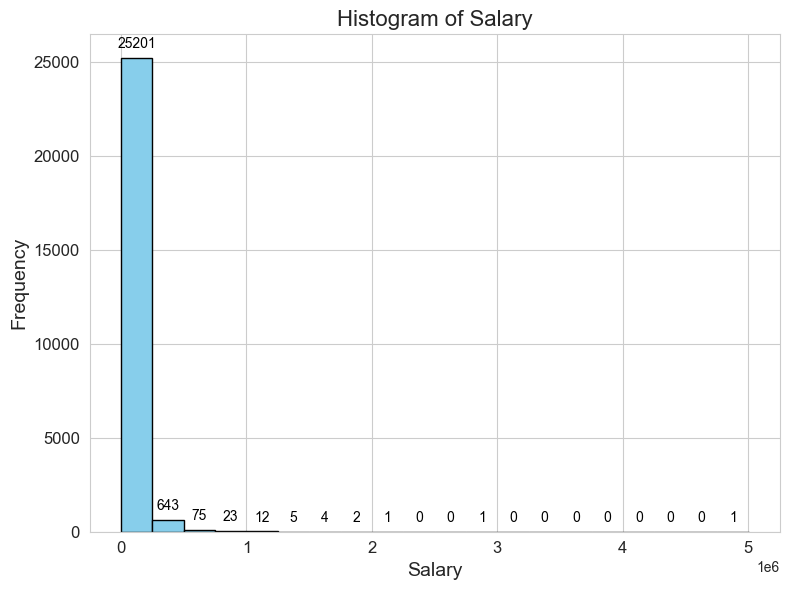

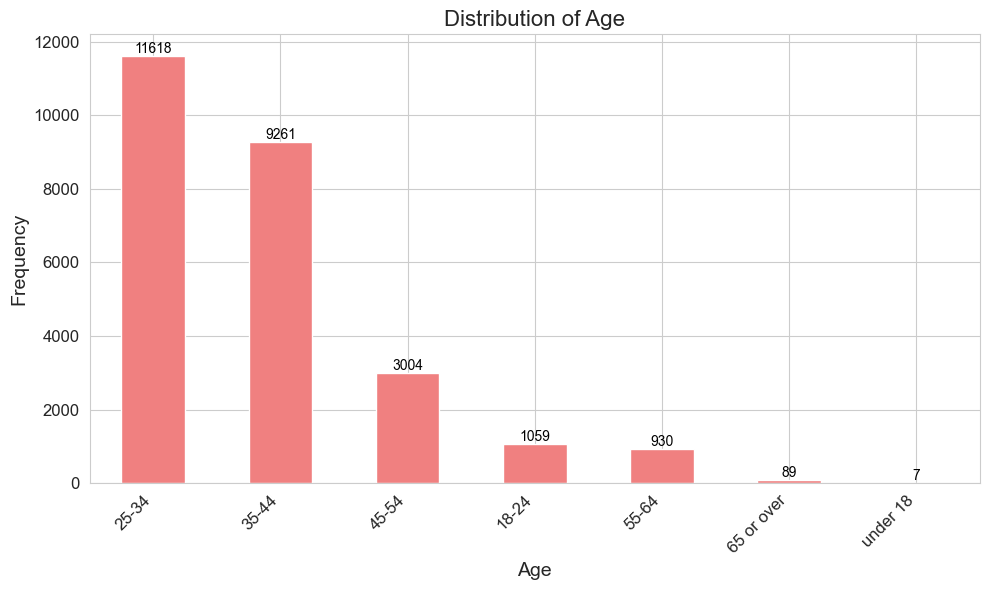

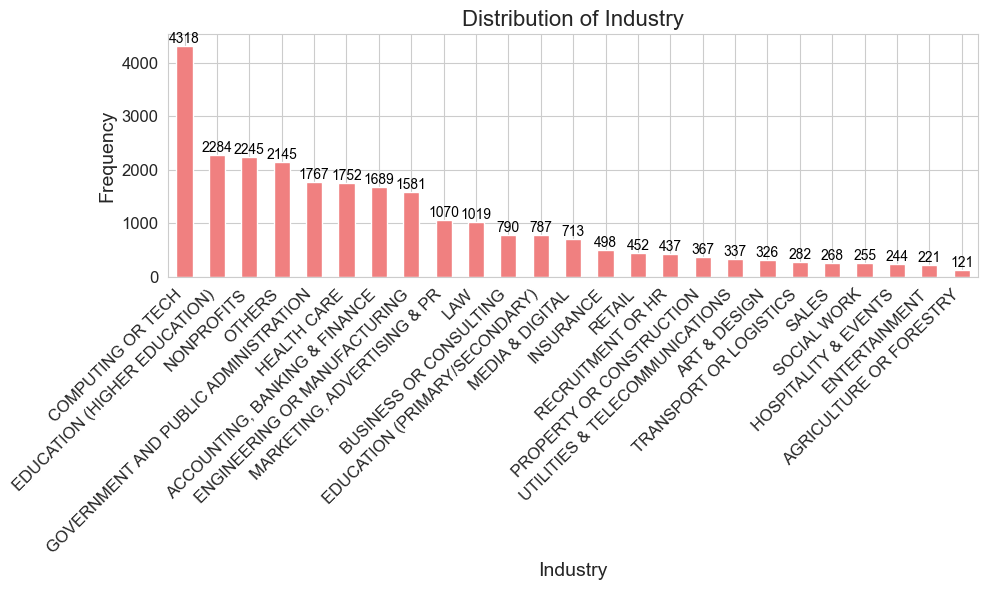

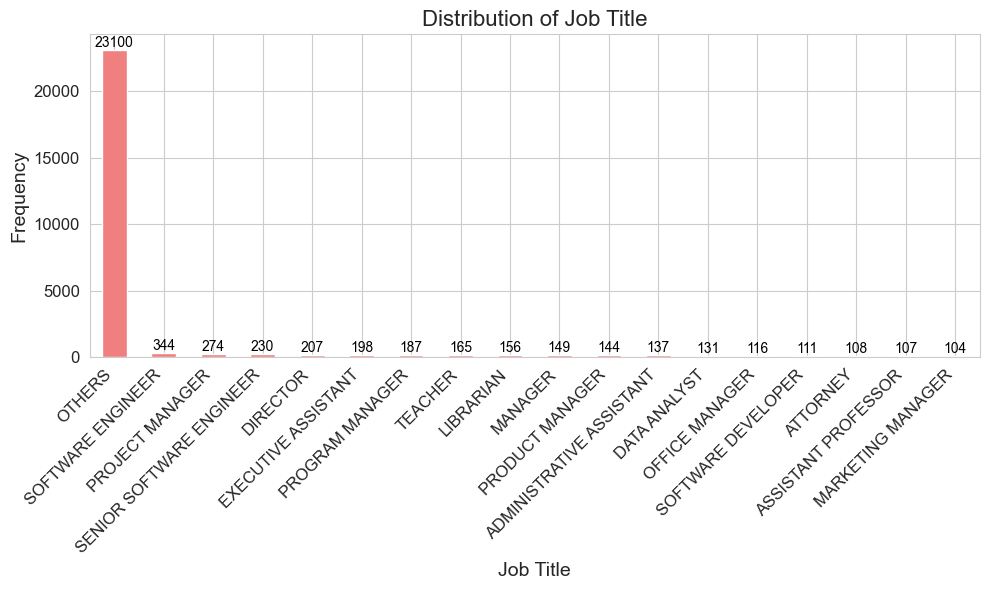

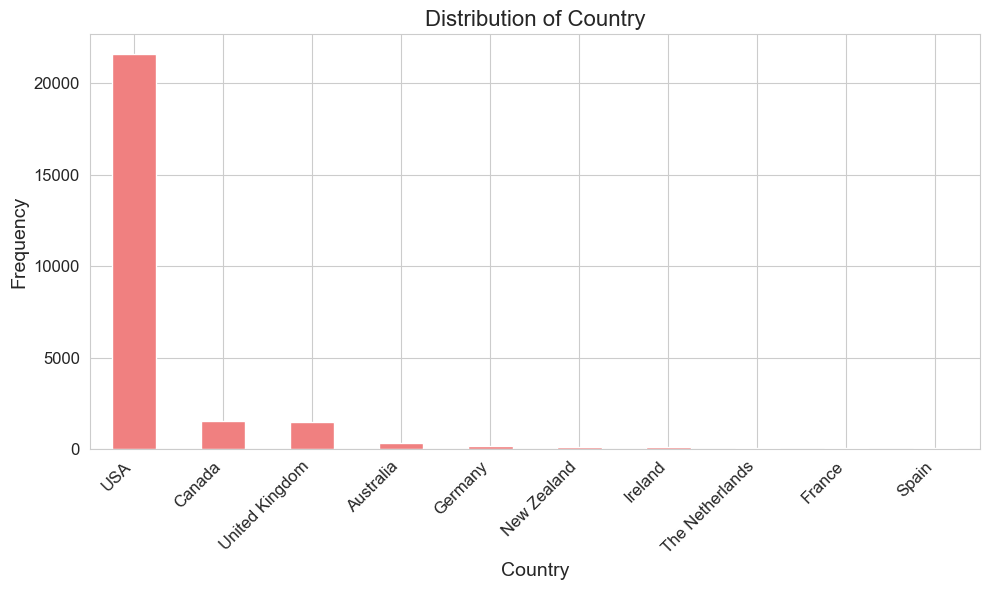

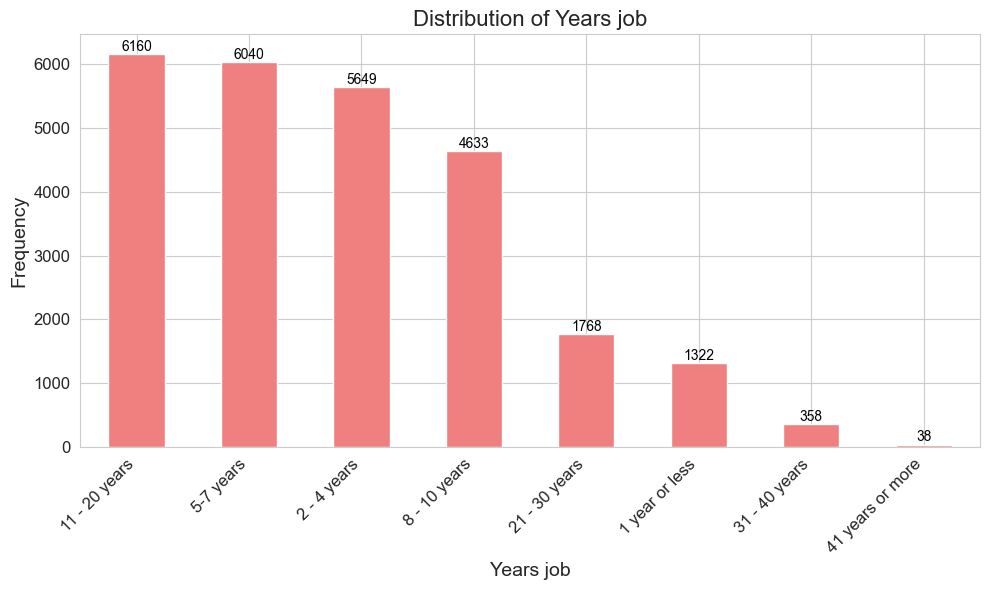

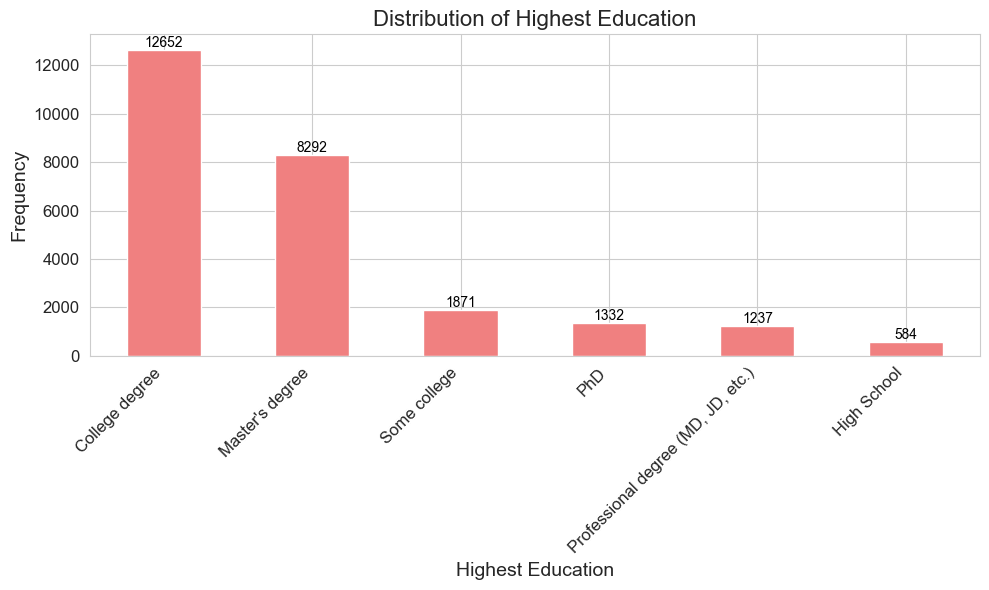

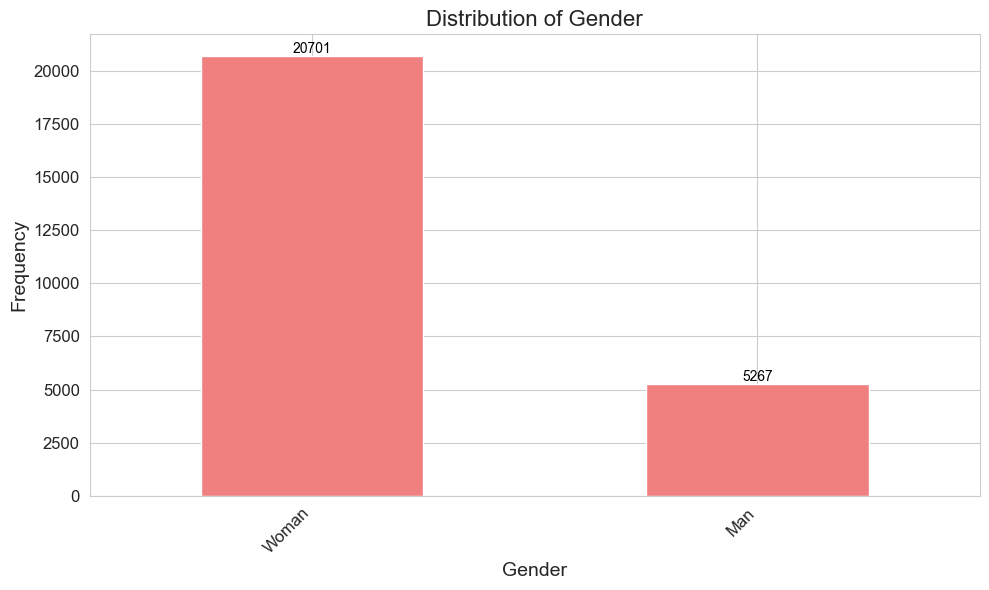

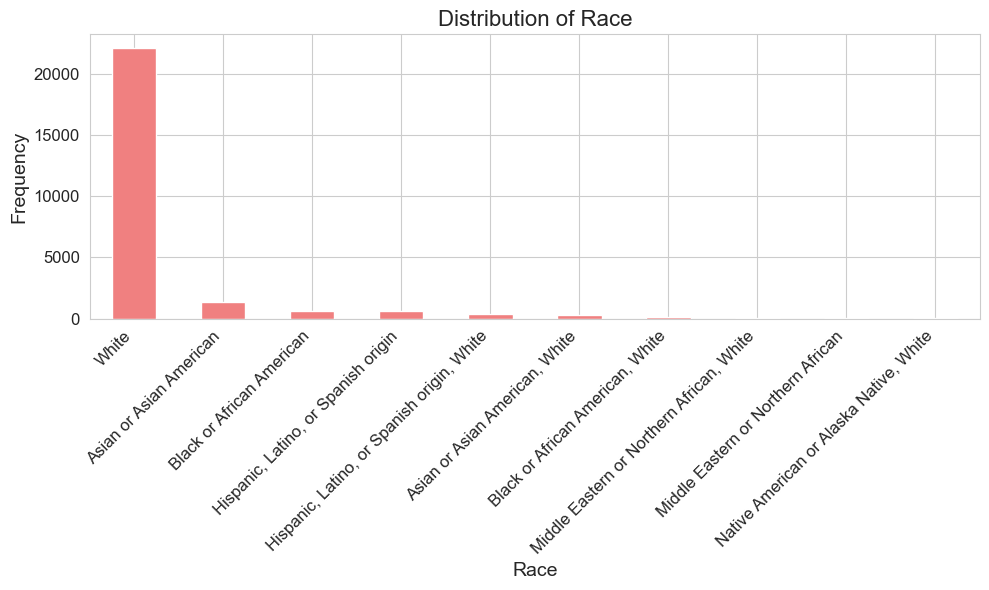

Numerical Statistics:
             Salary
count  2.596800e+04
mean   9.689263e+04
std    8.690066e+04
min    5.405040e+00
25%    5.532414e+04
50%    7.800000e+04
75%    1.144000e+05
max    5.004044e+06

Value counts for Age:
Age
25-34         11618
35-44          9261
45-54          3004
18-24          1059
55-64           930
65 or over       89
under 18          7
Name: count, dtype: int64

Value counts for Industry:
Industry
COMPUTING OR TECH                       4318
EDUCATION (HIGHER EDUCATION)            2284
NONPROFITS                              2245
OTHERS                                  2145
GOVERNMENT AND PUBLIC ADMINISTRATION    1767
HEALTH CARE                             1752
ACCOUNTING, BANKING & FINANCE           1689
ENGINEERING OR MANUFACTURING            1581
MARKETING, ADVERTISING & PR             1070
LAW                                     1019
BUSINESS OR CONSULTING                   790
EDUCATION (PRIMARY/SECONDARY)            787
MEDIA & DIGITAL             

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# numerical columns
for col in numerical_cols:
    if col != 'Unnamed: 0':
        plt.figure(figsize=(8, 6))
        ax = df[col].hist(color='skyblue', edgecolor='black', bins=20)
        plt.title(f'Histogram of {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

        plt.tight_layout()
        plt.show()

# categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    if col == 'Country':  # show only top-10
        top_countries = df[col].value_counts().nlargest(10)
        top_countries.plot(kind='bar', color='lightcoral')
    elif col == 'Race':  # show only top-10
        top_race_answers = df[col].value_counts().nlargest(10)
        top_race_answers.plot(kind='bar', color='lightcoral')
    else:
        df[col].value_counts().plot(kind='bar', color='lightcoral')
    
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    if col != 'Country' and col != 'Race':  
        for i, v in enumerate(df[col].value_counts()):
            plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10, color='black')
    
    plt.tight_layout()
    plt.show()

# statistics for numerical
numerical_stats = df[numerical_cols].describe()
print("Numerical Statistics:")
print(numerical_stats)

# statistics for categorical
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    if col == 'Country':  
        print(df[col].value_counts().nlargest(10))
    elif col == 'Race':  
        print(df[col].value_counts().nlargest(10))
    else:
        print(df[col].value_counts())

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['Salary'], axis=1)
df["Standard_sal"] = StandardScaler().fit_transform(df[['Salary']])
y = df['Standard_sal']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((20774, 8), (20774,), (5194, 8), (5194,))

In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessing_country = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ['Years job', 'Age', 'Highest Education']),
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['Country', 'Industry', 'Job Title', 'Race'])
    ]
)

X_train_transformed = preprocessing_country.fit_transform(X_train)
X_test_transformed = preprocessing_country.transform(X_test)

print('Category Mapping:', dict(zip(X_train, X_train_transformed)))
X_train_transformed.shape, X_test_transformed.shape

Category Mapping: {'Age': <1x167 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>, 'Industry': <1x167 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>, 'Job Title': <1x167 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>, 'Country': <1x167 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>, 'Years job': <1x167 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>, 'Highest Education': <1x167 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>, 'Gender': <1x167 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>, 'Race': <1x167 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sp

((20774, 167), (5194, 167))

In [15]:
import time
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

def models(X_train, X_test, y_train, y_test, name_decision_tree):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'RandomForestRegressor': RandomForestRegressor(),
        'DecisionTreeRegressor': DecisionTreeRegressor()
    }

    columns = ['Model', 'Run Time (minutes)', 'MSE', 'MAE', 'R2']
    df_models = pd.DataFrame(columns=columns)

    for model_name, model in models.items():
        start_time = time.time()
        
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        r_squared_train = r2_score(y_train, y_train_pred)
        r_squared_test = r2_score(y_test, y_test_pred)

        row = {'Model': model_name,
           'Run Time (minutes)': round((time.time() - start_time) / 60, 6),
           'MAE': train_mae,
           'MSE': train_mse,
           'R2': r_squared_train
           }

        df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)

        if model_name == 'DecisionTreeRegressor':
            df_train = pd.DataFrame(X_train_transformed.toarray())

            a = plot_tree(model, filled=True, feature_names=X_train.columns if hasattr(X_train, 'columns') else None, rounded=True, max_depth=1)
            #plt.savefig("decision_tree.png") 
            #plt.show() 

    return a, df_models

C:\Users\ricca\AppData\Local\Temp\ipykernel_17660\2305713409.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)


[Text(0.5, 0.8333333333333334, 'x[87] <= 0.5\nsquared_error = 1.043\nsamples = 20774\nvalue = -0.002'),
 Text(0.25, 0.5, 'x[1] <= 1.5\nsquared_error = 0.795\nsamples = 17316\nvalue = -0.112'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[79] <= 0.5\nsquared_error = 1.925\nsamples = 3458\nvalue = 0.55'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

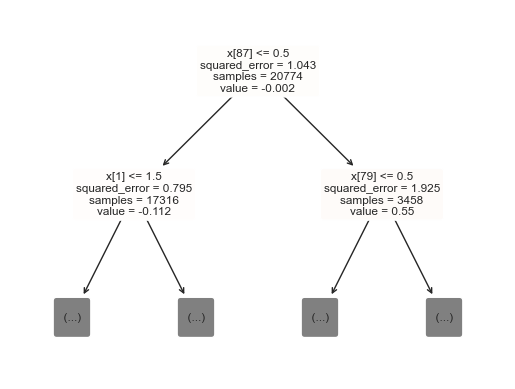

In [16]:

a, df_models_main = models(X_train_transformed, X_test_transformed, y_train, y_test, 'Main')
a

Analysis without Country, but with categories

In [17]:
high_sal = ['Luxembourg', 'Ireland', 'Singapore', 'Qatar', 'United Arab Emirates', 'Switzerland', 'USA', 'Norway', 'Denmark', 'The Netherlands', 'Iceland']
mid_sal = ['Saudi Arabia', 'Austria', 'Sweden', 'Belgium', 'Germany', 'Australia', 'Finland', 'Canada', 'France', 'South Korea', 'UK', 'Italy', 'Israel', 'Japan',
            'New Zealand', 'Slovenia', 'Kuwait', 'Spain']
low_sal = ['Lithuania', 'Czech Republic', 'Poland', 'Portugal', 'Bahamas', 'Croatia', 'Hungary', 'Estonia', 'Panama', 'Slovakia', 'Turkey', 'Puerto Rico', 'Romania',
            'Seychelles', 'Latvia', 'Greece']

In [18]:
def categories(x):
    if x in high_sal: return 'High'
    elif x in mid_sal: return 'Medium'
    elif x in low_sal: return 'Low'
    else: 'Poverty'

df['Category'] = df['Country'].apply(categories)
df['Category'].value_counts()

Category
High      21881
Medium     2435
Low          50
Name: count, dtype: int64

In [77]:
X = df.drop(['Salary'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

preprocessing = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ['Years job', 'Age', 'Highest Education']),
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['Category', 'Industry', 'Job Title', 'Race'])
    ]
)

X_train_transformed = preprocessing.fit_transform(X_train)
X_test_transformed = preprocessing.transform(X_test)
X_train_transformed.shape, X_test_transformed.shape

((20774, 91), (5194, 91))

C:\Users\ricca\AppData\Local\Temp\ipykernel_17660\2305713409.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)


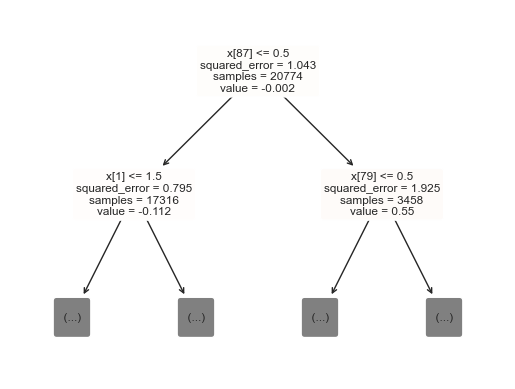

In [31]:
b, df_models_transformed = models(X_train_transformed, X_test_transformed, y_train, y_test, 'Category')

Analysis for each category

In [83]:
def analysis_categories(df, category: str):
    df_category = df[df['Category'] == category]
    X = df_category.drop(['Salary'], axis=1)
    y = df_category['Standard_sal']
    print(df_category.loc[df_category =='PhD'].columns)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
    X_train_transformed = preprocessing_country.fit_transform(X_train)
    X_test_transformed = preprocessing_country.transform(X_test)
    df_models = models(X_train_transformed, X_test_transformed, y_train, y_test, category)
    return df_models

In [84]:
df_models_high = analysis_categories(df, 'High')

Index(['Age', 'Industry', 'Job Title', 'Salary', 'Country', 'Years job',
       'Highest Education', 'Gender', 'Race', 'Standard_sal', 'Category'],
      dtype='object')


C:\Users\ricca\AppData\Local\Temp\ipykernel_17660\2305713409.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)


KeyboardInterrupt: 

196      PhD
1703     PhD
1781     PhD
1900     PhD
2061     PhD
        ... 
27868    PhD
27911    PhD
27931    PhD
27946    PhD
28027    PhD
Name: Highest Education, Length: 135, dtype: object


C:\Users\ricca\AppData\Local\Temp\ipykernel_17660\2305713409.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_models = pd.concat([df_models, pd.DataFrame([row])], ignore_index=True)


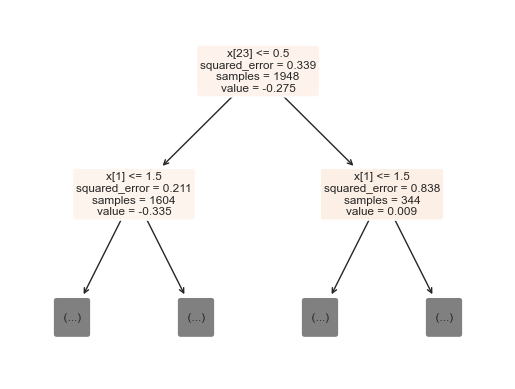

In [72]:
df_models_medium = analysis_categories(df, 'Medium')

In [74]:

df_models_low = analysis_categories(df, 'Low')

756      PhD
2137     PhD
11848    PhD
Name: Highest Education, dtype: object


ValueError: Found unknown categories ['PhD'] in column 2 during transform

In [ ]:
print(df_models_high, df_models_medium, df_models_low)

                   Model  Run Time (minutes)       MSE       MAE        R2
0      Linear Regression                0.00  0.988586  0.468398  0.133924
1                  Ridge                0.00  0.989838  0.468617  0.132827
2                  Lasso                0.00  1.141455  0.546445  0.000000
3  RandomForestRegressor                2.17  0.526839  0.353716  0.538449                    Model  Run Time (minutes)       MSE       MAE        R2
0      Linear Regression                0.00  0.279905  0.281506  0.173486
1                  Ridge                0.00  0.280151  0.281169  0.172762
2                  Lasso                0.00  0.338658  0.323197  0.000000
3  RandomForestRegressor                0.24  0.105671  0.150511  0.687971
